#  Introduction
In this notebook, we will perform Exploratory Data Analysis (EDA) for 3 tasks of my virtual internship at **The Sparks Foundation** to gain insights that can help us take effective decisions.

<br><br>
<div style="text-align: center;">
    <h1>The Sparks Foundation</h1>
    <img src="the-sparks-foundation.png" alt="Sample Image" width="400" height="200">
</div>

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Task 1

## Superstore

<div style="text-align: center;">
    <img src="superstore.png" alt="Sample Image" width="1000" height="200">
</div>

In [2]:
# Load the Superstore dataset
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# Calculate Total Sales and Total Profits
total_sales = round(df['Sales'].sum(), 2)
total_profits = round(df['Profit'].sum(), 2)

# Calculate Average Quantity and Average Discount
average_quantity = round(df['Quantity'].mean(), 2)
average_discount = round(df['Discount'].mean(), 2)

total_sales, total_profits, average_quantity, average_discount

(2297200.86, 286397.02, 3.79, 0.16)

<div style="display: flex; flex-direction: column; align-items: center; justify-content: center; text-align: center; background-color: #f5f5f5; padding: 15px; border-radius: 10px; box-shadow: 2px 2px 5px #888888;">

  <div style="margin: 20px auto;">
    <h1 style="font-size: 24px; text-align: center; color: red;">Total Sales</h1>
    <p style="font-size: 20px;">$2.3 M</p>
  </div>

  <div style="margin: 20px auto;">
    <h1 style="font-size: 24px; text-align: center; color: red;">Total Profits</h1>
    <p style="font-size: 20px;">$286.4 K</p>
  </div>

  <div style="margin: 20px auto;">
    <h1 style="font-size: 24px; text-align: center; color: red;">Average Quantity</h1>
    <p style="font-size: 20px;">3.79</p>
  </div>

  <div style="margin: 20px auto;">
    <h1 style="font-size: 24px; text-align: center; color: red;">Average Discount</h1>
    <p style="font-size: 20px;">% 16</p>
  </div>

</div>

#### 1. What are the different shipping modes used?

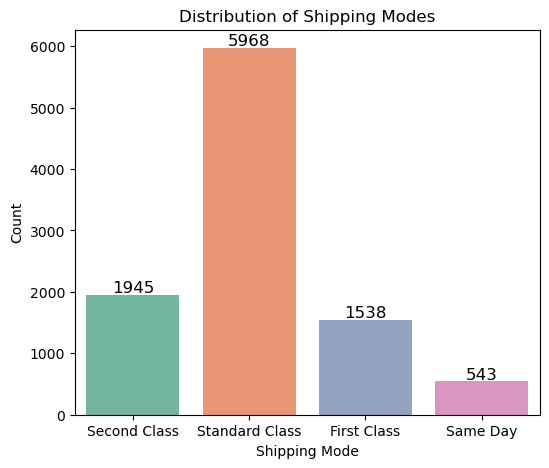

In [5]:
# Count of each shipping mode
shipping_mode_counts = df['Ship Mode'].value_counts()

# Create a countplot
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Ship Mode', palette='Set2')
plt.title('Distribution of Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

#### 2. What is the distribution of segments (Consumer, Corporate, Home Office) in the dataset?

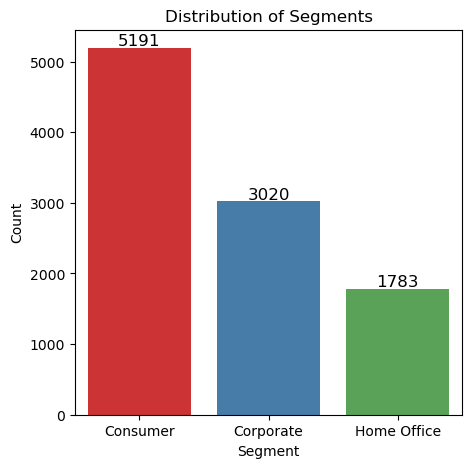

In [6]:
# Count of each segment
segment_counts = df['Segment'].value_counts()

# Create a countplot
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x='Segment', palette='Set1')
plt.title('Distribution of Segments')
plt.xlabel('Segment')
plt.ylabel('Count')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

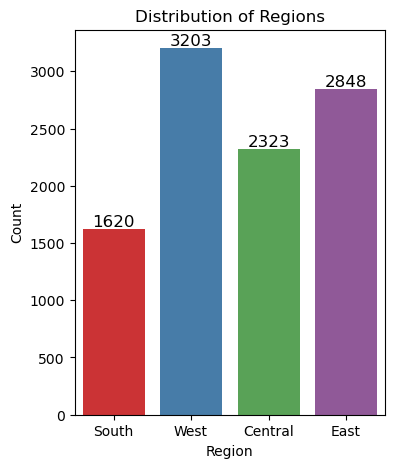

In [7]:
# Count of each region
region_counts = df['Segment'].value_counts()

# Create a countplot
plt.figure(figsize=(4, 5))
ax = sns.countplot(data=df, x='Region', palette='Set1')
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

#### 3. What is the distribution of categories in the dataset?

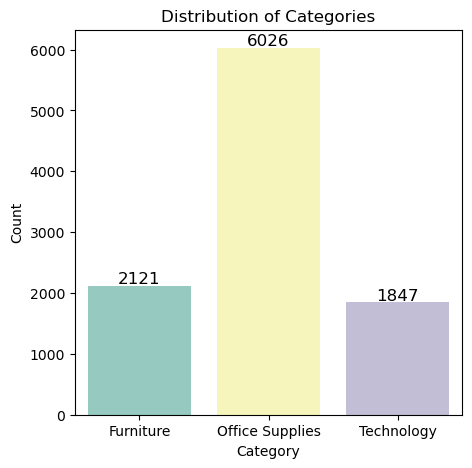

In [8]:
# Count of each category
category_counts = df['Category'].value_counts()

# Create a countplot
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x='Category', palette='Set3')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

#### 4. Which sub-categories have the highest sales?

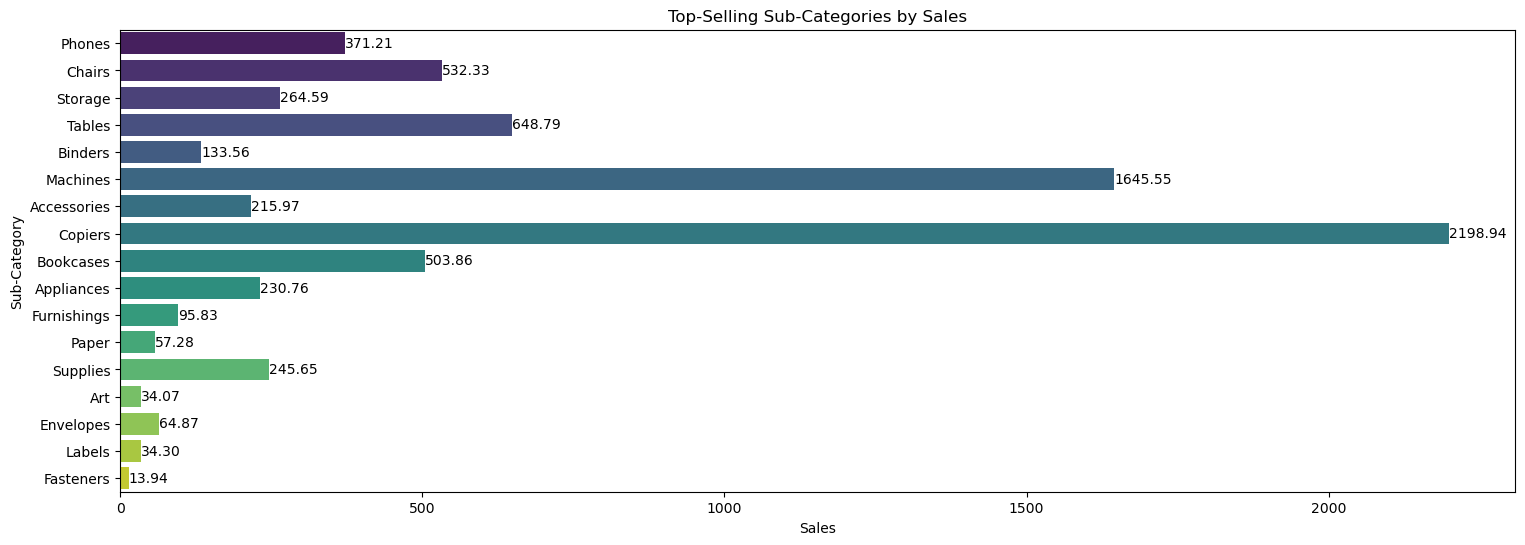

In [9]:
# Total sales for each sub-category
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Create a bar plot with sorted order
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=df, x='Sales', y='Sub-Category', palette='viridis', errorbar=None, order=sub_category_sales.index)
plt.title('Top-Selling Sub-Categories by Sales')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{width:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.show()

#### 5. What is the relationship between discount and profit?

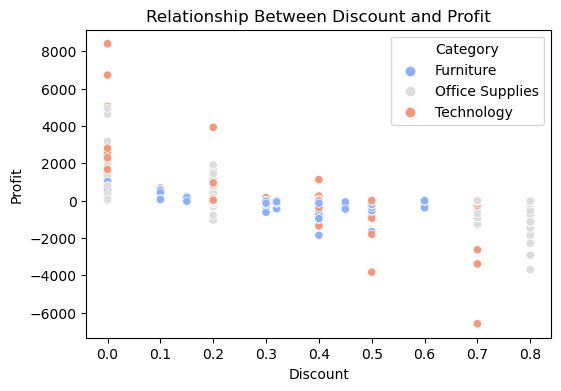

In [10]:
# Scatter plot of discount vs. profit
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', palette='coolwarm')
plt.title('Relationship Between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

#### 6. What is the distribution of profit across different regions?

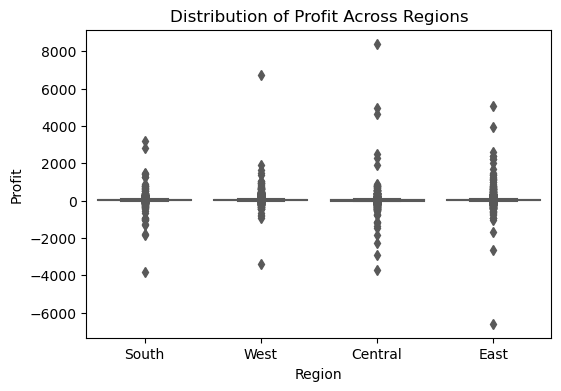

In [11]:
# Box plot of profit by region
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Region', y='Profit', palette='Set2')
plt.title('Distribution of Profit Across Regions')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

#### 7. What is the distribution of profit for each category and segment combination?

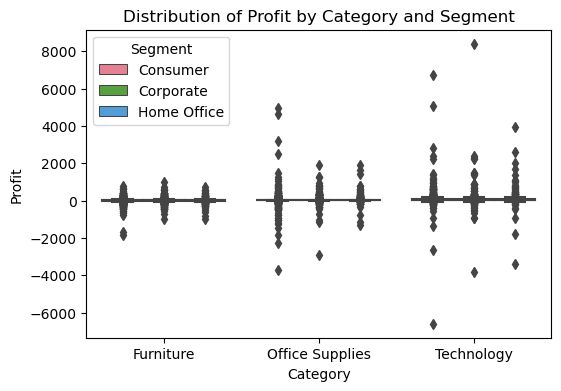

In [12]:
# Box plot of profit by category and segment
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Category', y='Profit', hue='Segment', palette='husl')
plt.title('Distribution of Profit by Category and Segment')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks()
plt.show()

#### 8. How does profit vary with the quantity of items sold?

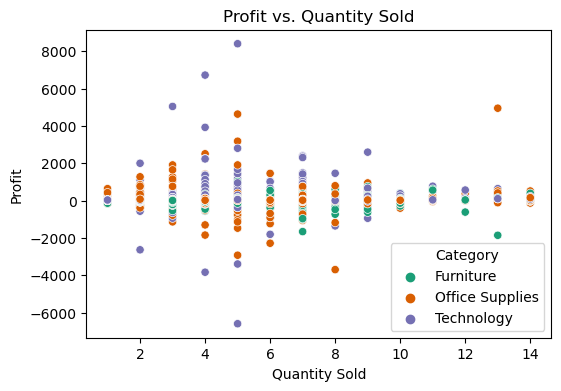

In [13]:
# Scatter plot of quantity vs. profit
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Quantity', y='Profit', hue='Category', palette='Dark2')
plt.title('Profit vs. Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Profit')
plt.show()

#### 9. What is the relation between the Sales and Profit?

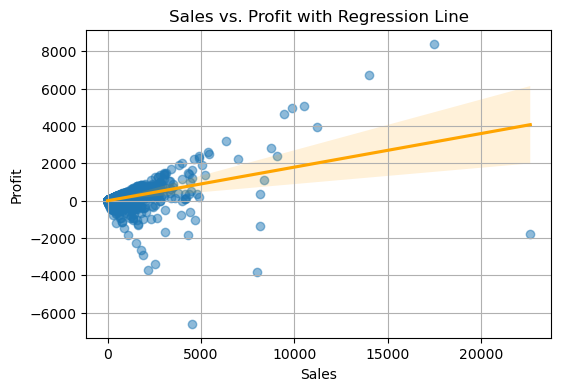

In [14]:
# Create a scatter plot with a regression line
plt.figure(figsize=(6, 4))
sns.regplot(data=df, x='Sales', y='Profit', scatter_kws={'alpha':0.5}, line_kws={'color': 'orange'})
plt.title('Sales vs. Profit with Regression Line')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

#### 10. What is the correlation between sales, profit, Quantity, and discount?

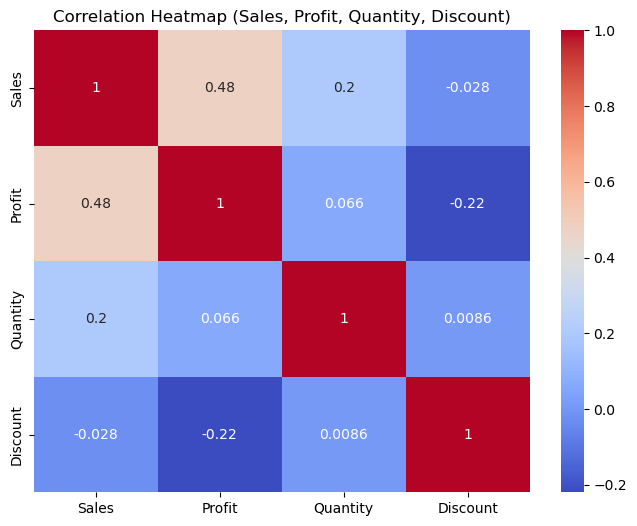

In [15]:
# Compute the correlation matrix
correlation_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Sales, Profit, Quantity, Discount)')
plt.show()

#### 11. Which sub-categories contribute the most to the total profit within each category, and how does their profitability compare?

In [16]:
# Group the data by 'Category' and 'Sub-Category' and calculate the sum of profit for each group
profit_by_subcategory = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Display the result
profit_by_subcategory

,Category,Sub-Category,Profit
0,Furniture,Bookcases,-3472.5560
1,Furniture,Chairs,26590.1663
2,Furniture,Furnishings,13059.1436
3,Furniture,Tables,-17725.4811
4,Office Supplies,Appliances,18138.0054
5,Office Supplies,Art,6527.7870
6,Office Supplies,Binders,30221.7633
7,Office Supplies,Envelopes,6964.1767
8,Office Supplies,Fasteners,949.5182
9,Office Supplies,Labels,5546.2540


In [17]:
# Pivot the data to create a suitable format for a bar chart
pivot_profit = profit_by_subcategory.pivot(index='Sub-Category', columns='Category', values='Profit')
pivot_profit

Category,Furniture,Office Supplies,Technology
Sub-Category,,,
Accessories,NaN,NaN,41936.6357
Appliances,NaN,18138.0054,NaN
Art,NaN,6527.7870,NaN
Binders,NaN,30221.7633,NaN
Bookcases,-3472.5560,NaN,NaN
Chairs,26590.1663,NaN,NaN
Copiers,NaN,NaN,55617.8249
Envelopes,NaN,6964.1767,NaN
Fasteners,NaN,949.5182,NaN


<Figure size 1200x600 with 0 Axes>

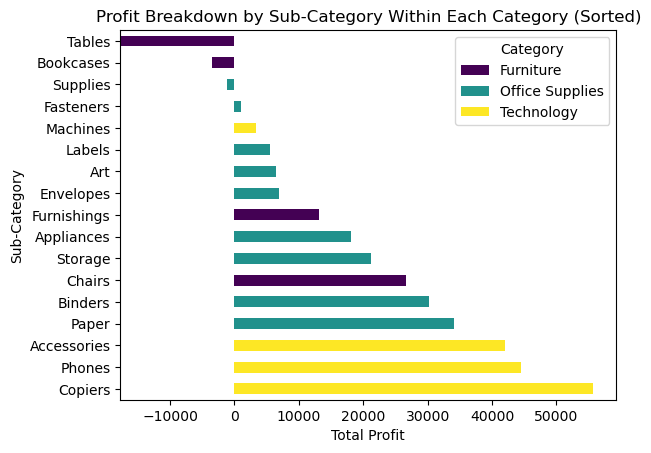

In [18]:
# Sort the pivot_profit DataFrame by total profit in descending order
sorted_pivot_profit = pivot_profit.sum(axis=1).sort_values(ascending=False).index
pivot_profit = pivot_profit.loc[sorted_pivot_profit]

# Create a horizontal stacked bar chart
plt.figure(figsize=(12, 6))
pivot_profit.plot(kind='barh', stacked=True, colormap='viridis')
plt.title('Profit Breakdown by Sub-Category Within Each Category (Sorted)')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.show()

#### 12. Which ship modes contribute the most to both sales and profit, and how do their contributions compare?

In [19]:
# Group the data by 'Ship Mode' and calculate the sum of sales and profit for each mode
sales_profit_by_ship_mode = df.groupby('Ship Mode').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a DataFrame to store the information
ship_mode_df = pd.DataFrame(sales_profit_by_ship_mode)

# Display the DataFrame
ship_mode_df

,Ship Mode,Sales,Profit
0,First Class,3.514284e+05,48969.8399
1,Same Day,1.283631e+05,15891.7589
2,Second Class,4.591936e+05,57446.6354
3,Standard Class,1.358216e+06,164088.7875


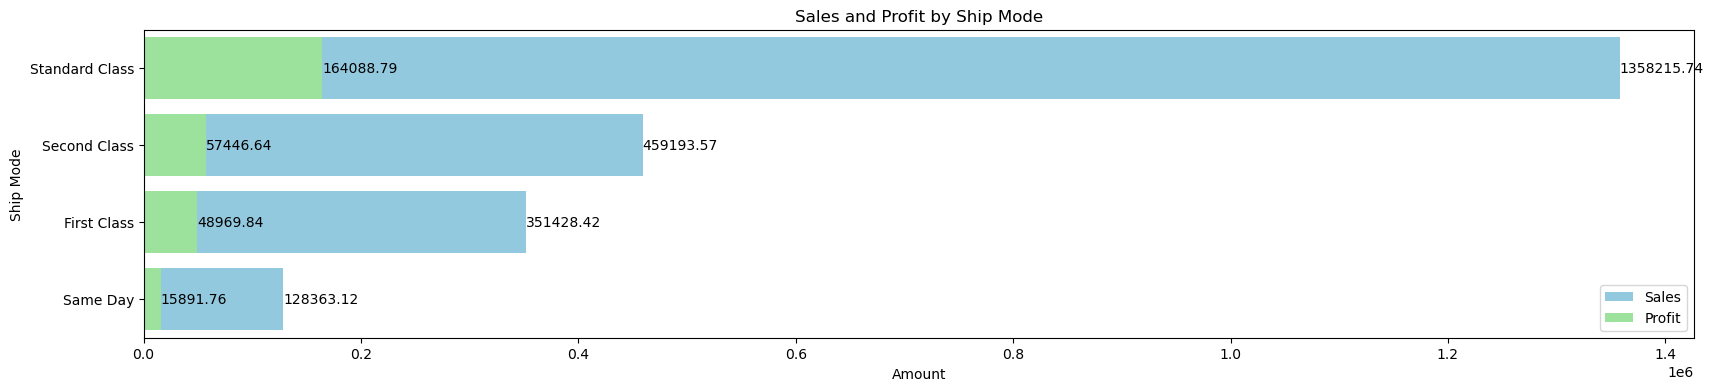

In [20]:
# Sort the shipmode_df DataFrame by 'Sales'
sorted_shipmode_df = ship_mode_df.sort_values(by='Sales', ascending=False)

# Create a bar chart
plt.figure(figsize=(20, 4))
ax = sns.barplot(data=sorted_shipmode_df, y='Ship Mode', x='Sales', color='skyblue', label='Sales')
sns.barplot(data=sorted_shipmode_df, y='Ship Mode', x='Profit', color='lightgreen', label='Profit')
plt.title('Sales and Profit by Ship Mode')
plt.ylabel('Ship Mode')
plt.xlabel('Amount')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{width:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.legend()
plt.show()

#### 13. Which segments contribute the most to both sales and profit, and how do their contributions compare?

In [21]:
# Group the data by 'Segment' and calculate the sum of sales and profit for each segment
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a DataFrame for segment
segment_df = pd.DataFrame(sales_profit_by_segment)

# Display the DataFrame
segment_df

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


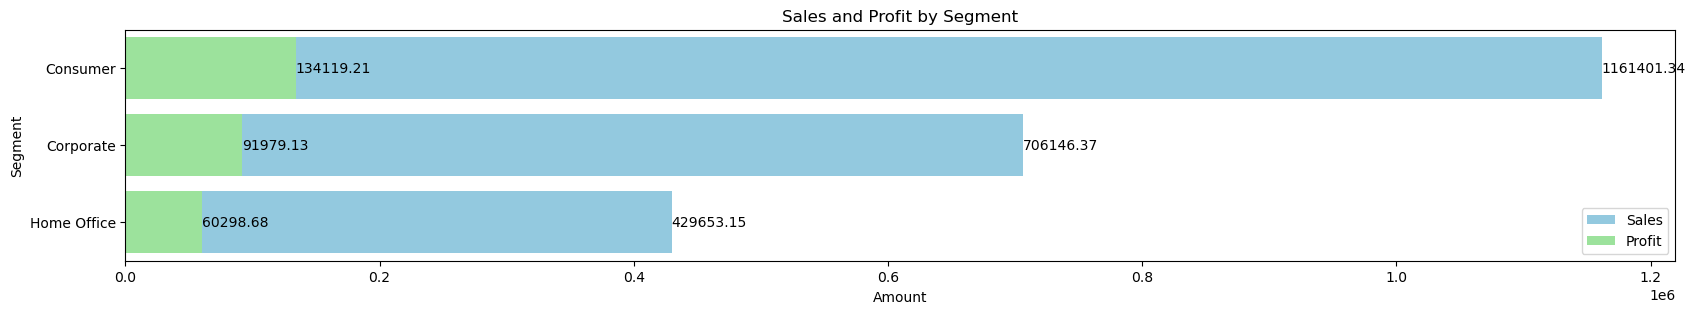

In [22]:
# Sort the segment_df DataFrame by 'Sales'
sorted_segment_df = segment_df.sort_values(by='Sales', ascending=False)

# Create a bar chart
plt.figure(figsize=(20, 3))
ax = sns.barplot(data=sorted_segment_df, y='Segment', x='Sales', color='skyblue', label='Sales')
sns.barplot(data=sorted_segment_df, y='Segment', x='Profit', color='lightgreen', label='Profit')
plt.title('Sales and Profit by Segment')
plt.ylabel('Segment')
plt.xlabel('Amount')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{width:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.legend()
plt.show()

#### 14. Which regions contribute the most to both sales and profit, and how do their contributions compare?

In [23]:
# Group the data by 'Region' and calculate the sum of sales and profit for each region
sales_profit_by_region = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a DataFrame for region
region_df = pd.DataFrame(sales_profit_by_region)

# Display the DataFrame
region_df

,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


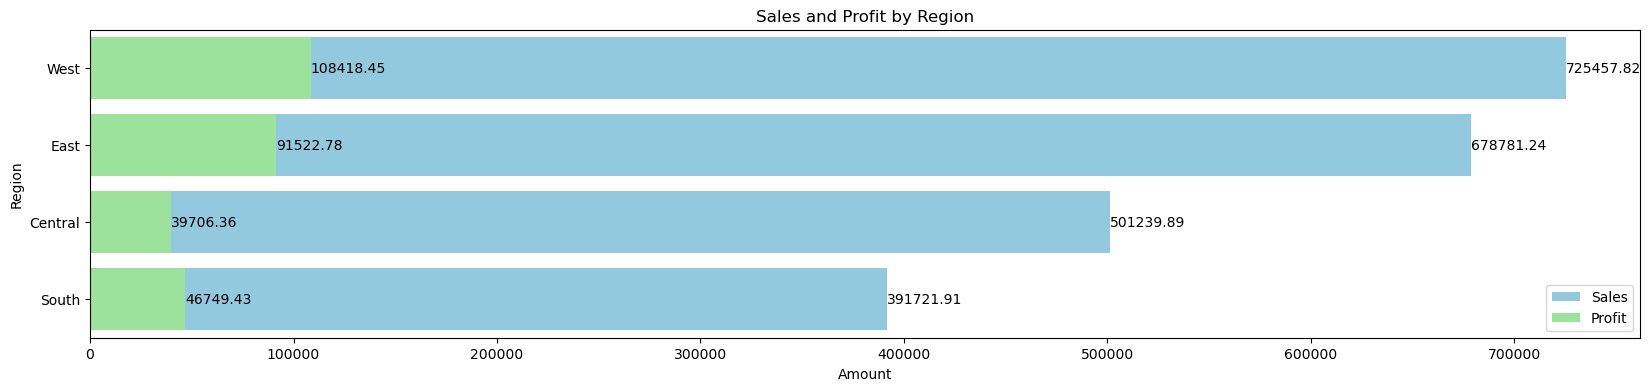

In [24]:
# Sort the region_df DataFrame by 'Sales'
sorted_region_df = region_df.sort_values(by='Sales', ascending=False)

# Create a bar chart
plt.figure(figsize=(20, 4))
ax = sns.barplot(data=sorted_region_df, y='Region', x='Sales', color='skyblue', label='Sales')
sns.barplot(data=sorted_region_df, y='Region', x='Profit', color='lightgreen', label='Profit')
plt.title('Sales and Profit by Region')
plt.ylabel('Region')
plt.xlabel('Amount')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{width:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.legend()
plt.show()

#### 15. Which categories contribute the most to both sales and profit, and how do their contributions compare?

In [25]:
# Group the data by 'Category' and calculate the sum of sales and profit for each category
sales_profit_by_category = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a DataFrame for category
category_df = pd.DataFrame(sales_profit_by_category)

# Display the DataFrame
category_df

,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


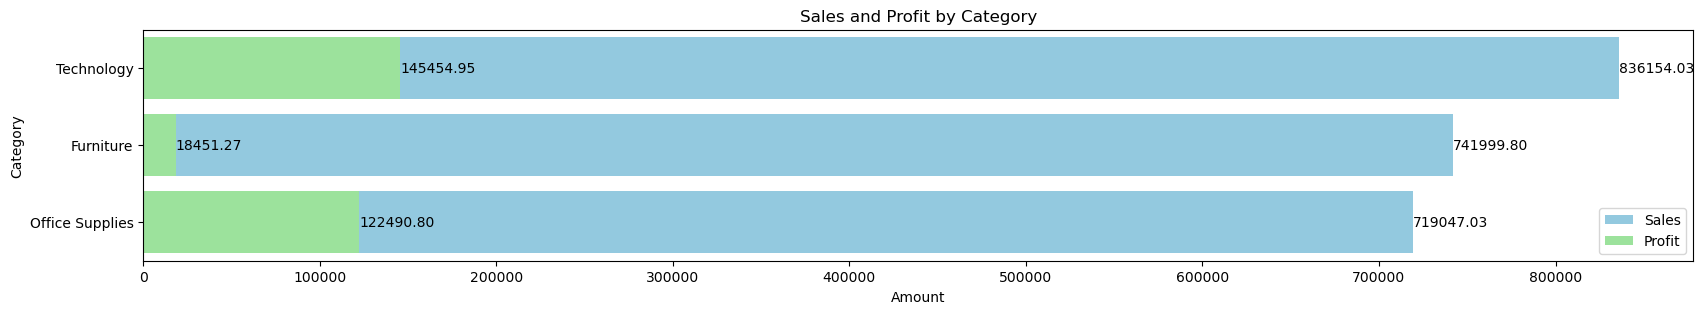

In [26]:
# Sort the category_df DataFrame by 'Sales'
sorted_category_df = category_df.sort_values(by='Sales', ascending=False)

# Create a bar chart
plt.figure(figsize=(20, 3))
ax = sns.barplot(data=sorted_category_df, y='Category', x='Sales', color='skyblue', label='Sales')
sns.barplot(data=sorted_category_df, y='Category', x='Profit', color='lightgreen', label='Profit')
plt.title('Sales and Profit by Category')
plt.ylabel('Category')
plt.xlabel('Amount')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{width:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.legend()
plt.show()

### 16. Which sub-categories contribute the most to both sales and profit, and how do their contributions compare?

In [27]:
# Group the data by 'Sub-Category' and calculate the sum of sales and profit for each sub-category
sales_profit_by_subcategory = df.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a DataFrame for sub-category
subcategory_df = pd.DataFrame(sales_profit_by_subcategory)

# Display the DataFrame
subcategory_df

,Sub-Category,Sales,Profit
0,Accessories,167380.3180,41936.6357
1,Appliances,107532.1610,18138.0054
2,Art,27118.7920,6527.7870
3,Binders,203412.7330,30221.7633
4,Bookcases,114879.9963,-3472.5560
5,Chairs,328449.1030,26590.1663
6,Copiers,149528.0300,55617.8249
7,Envelopes,16476.4020,6964.1767
8,Fasteners,3024.2800,949.5182
9,Furnishings,91705.1640,13059.1436


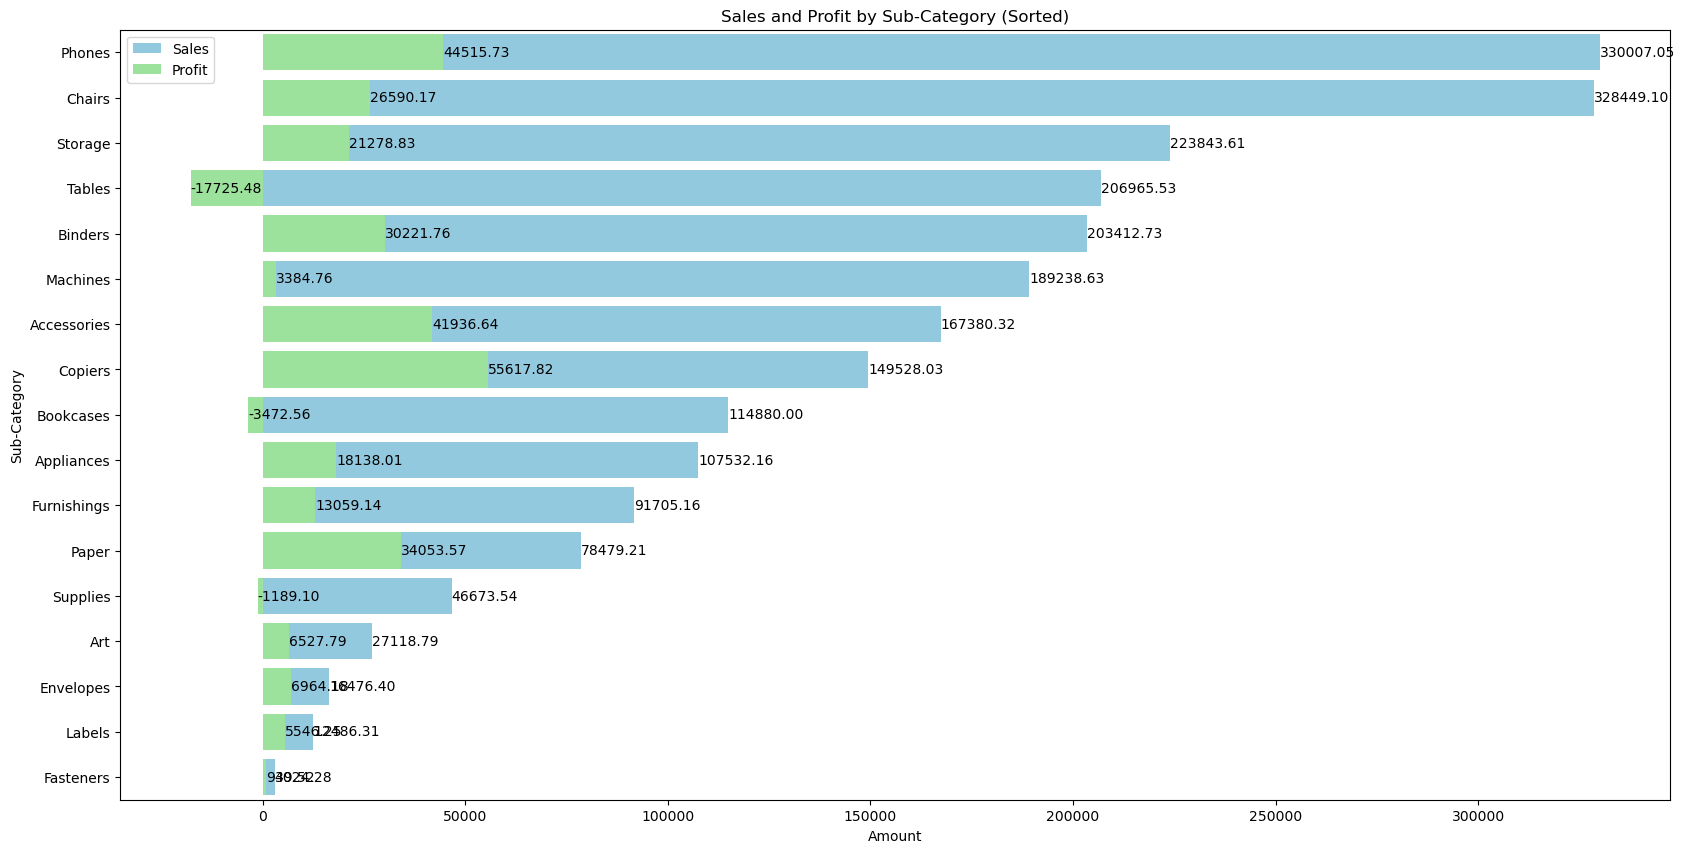

In [28]:
# Sort the subcategory_df DataFrame by 'Sales'
sorted_subcategory_df = subcategory_df.sort_values(by='Sales', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=sorted_subcategory_df, y='Sub-Category', x='Sales', color='skyblue', label='Sales')
sns.barplot(data=sorted_subcategory_df, y='Sub-Category', x='Profit', color='lightgreen', label='Profit')
plt.title('Sales and Profit by Sub-Category (Sorted)')
plt.ylabel('Sub-Category')
plt.xlabel('Amount')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{width:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.legend()
plt.show()

## **Analysis Summary and Recommendations**

After conducting a thorough analysis of our sales and profit data, we've identified areas where improvements can be made. Here are our key findings and recommendations:

### **1. Identify Weak Areas**

- Pinpoint categories and sub-categories with underperforming sales and profits.

### **2. Explore New Techniques**

- Investigate innovative sales and marketing strategies tailored to the underperforming categories.

### **3. Product Diversification**

- Expand our product range within these categories to attract a broader audience.

### **4. Media and Promotion**

- Explore new promotional channels, including social media and influencer marketing.

### **5. Customer Engagement**

- Enhance customer engagement and loyalty programs to boost retention.

### **6. Inventory Management**

- Optimize inventory management to prevent stockouts and overstock situations.

### **7. Analyze Top Performers**

- Continuously monitor top-performing categories to identify trends and scaling opportunities.

### **8. Data-Driven Decision-Making**

- Utilize data analytics for informed decision-making and regular strategy adjustments.

By implementing these strategies, we aim to improve sales and profits in weaker areas while sustaining and nurturing our top-performing categories.

# Task 2

## Global Terrorism

<div style="text-align: center;">
    <img src="terrorism.png" alt="Sample Image" width="1000" height="200">
</div>

In [29]:
import pandas as pd

# Replace 'latin1' with the appropriate encoding if needed
terrorism = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
terrorism.head()


C:\Users\Abdel\AppData\Local\Temp\ipykernel_12684\1231051153.py:4: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [30]:
# Define a function to extract the year
def extract_year(date_str):
    if pd.notna(date_str):  # Check if the value is not NaN
        # Try different date patterns
        match = re.search(r'\d{4}', date_str)
        if match:
            return match.group()
        match = re.search(r'(\d{1,2}/\d{1,2}/\d{4})', date_str)
        if match:
            return match.group()
    return 'NaN'

# Apply the function to the 'approxdate' column
terrorism['approxdate'] = terrorism['approxdate'].apply(extract_year)

In [31]:
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [32]:
# Calculate general statistics
total_incidents = len(terrorism)
total_fatalities = terrorism['nkill'].sum()
total_injuries = terrorism['nwound'].sum()
unique_countries = terrorism['country_txt'].nunique()
unique_regions = terrorism['region_txt'].nunique()
unique_attack_types = terrorism['attacktype1_txt'].nunique()

# Create summary cards
summary_cards = [
    f"Total Incidents: {total_incidents}",
    f"Total Fatalities: {total_fatalities}",
    f"Total Injuries: {total_injuries}",
    f"Unique Countries: {unique_countries}",
    f"Unique Regions: {unique_regions}",
    f"Unique Attack Types: {unique_attack_types}",
]

# Print summary cards
for card in summary_cards:
    print(card)

Total Incidents: 181691
Total Fatalities: 411868.0
Total Injuries: 523869.0
Unique Countries: 205
Unique Regions: 12
Unique Attack Types: 9


<div style="display: flex; flex-direction: column; align-items: center; justify-content: center; text-align: center; background-color: #f5f5f5; padding: 15px; border-radius: 10px; box-shadow: 2px 2px 5px #888888;">

  <div style="margin: 20px auto;">
    <h1 style="font-size: 24px; text-align: center; color: red;">Total Incidents</h1>
    <p style="font-size: 20px;">181691</p>
  </div>

  <div style="margin: 20px auto;">
    <h1 style="font-size: 24px; text-align: center; color: red;">Total Fatalities</h1>
    <p style="font-size: 20px;">411868</p>
  </div>

  <div style="margin: 20px auto;">
    <h1 style="font-size: 24px; text-align: center; color: red;">Total Injuries</h1>
    <p style="font-size: 20px;">523869</p>
  </div>

</div>

<div style="display: flex; flex-direction: column; align-items: center; justify-content: center; text-align: center; background-color: #f5f5f5; padding: 15px; border-radius: 10px; box-shadow: 2px 2px 5px #888888;">

  <div style="margin: 20px auto;">
    <h1 style="font-size: 24px; text-align: center; color: red;">Total Attacked Countries</h1>
    <p style="font-size: 20px;">205</p>
  </div>

  <div style="margin: 20px auto;">
    <h1 style="font-size: 24px; text-align: center; color: red;">Total Attacked Regions</h1>
    <p style="font-size: 20px;">12</p>
  </div>

  <div style="margin: 20px auto;">
    <h1 style="font-size: 24px; text-align: center; color: red;">Total Attack Types</h1>
    <p style="font-size: 20px;">9</p>
  </div>

</div>

#### 1. Trend in the number of terrorist incidents over the years

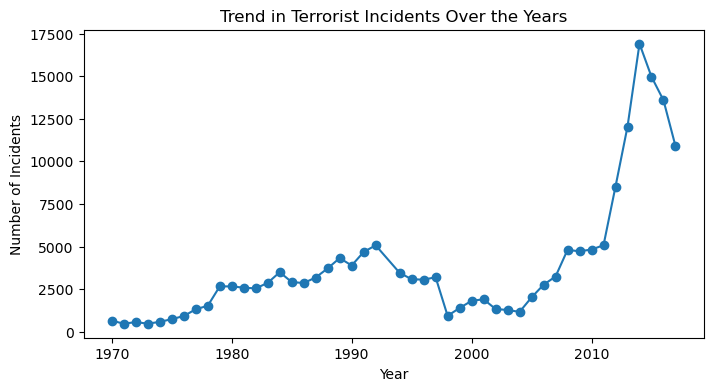

In [33]:
yearly_incidents = terrorism['iyear'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(yearly_incidents.index, yearly_incidents.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Trend in Terrorist Incidents Over the Years')
plt.show()

#### 2. Monthly and daily distribution of incidents

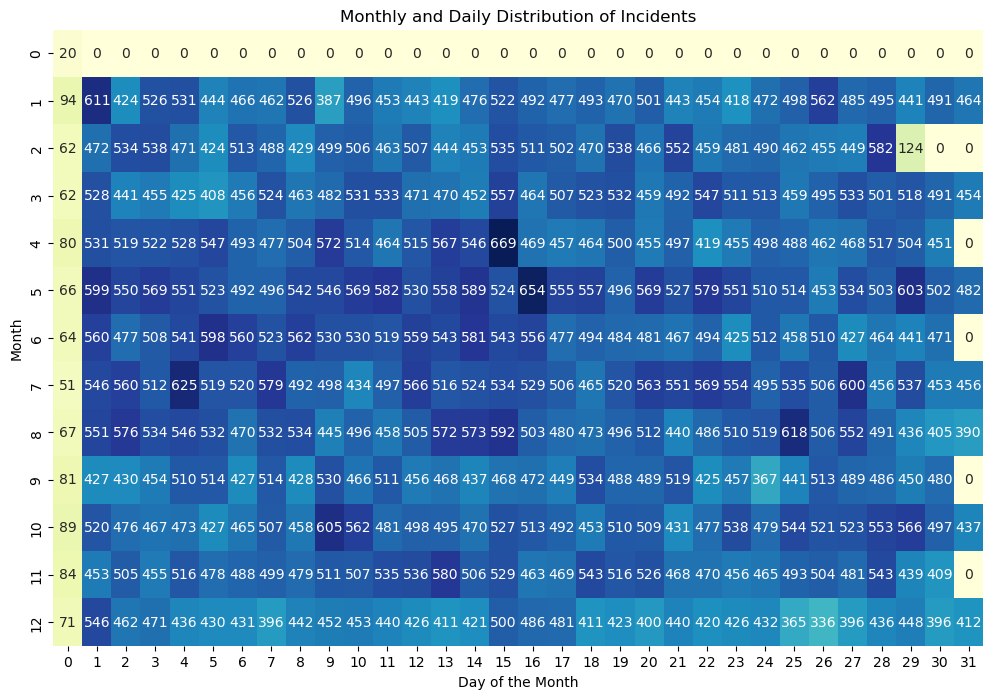

In [34]:
# Create a pivot table for monthly and daily distribution
monthly_day_pivot = terrorism.pivot_table(index='imonth', columns='iday', values='eventid', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_day_pivot, cmap='YlGnBu', annot=True, fmt='d', cbar=False)
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.title('Monthly and Daily Distribution of Incidents')
plt.show()

#### 3. Countries with the highest number of terrorist incidents

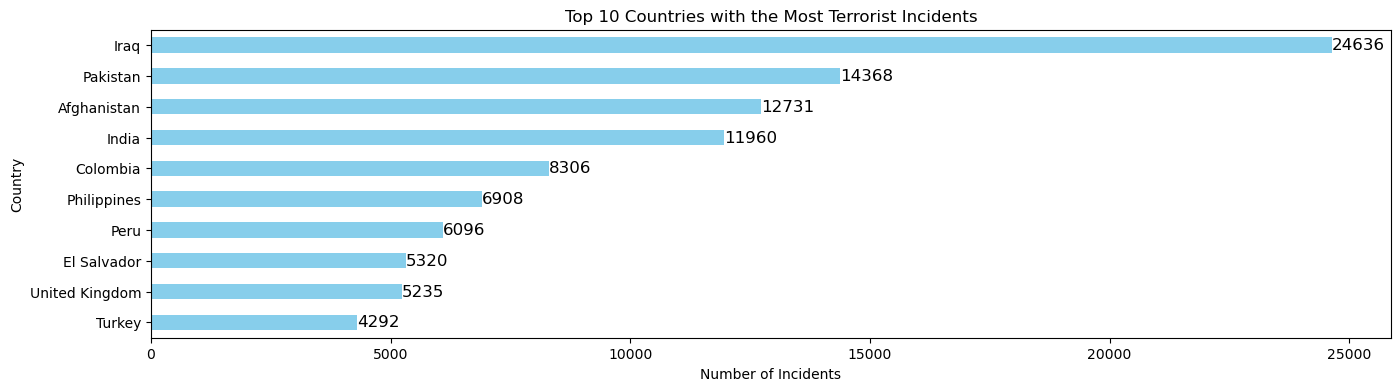

In [35]:
top_countries = terrorism['country_txt'].value_counts().head(10)

# Sort the top countries by the number of incidents in descending order
top_countries = top_countries.sort_values(ascending=True)

plt.figure(figsize=(16, 4))
ax = top_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries with the Most Terrorist Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Country')
plt.xticks()

# Add data labels to each bar
for i, v in enumerate(top_countries):
    ax.text(v + 5, i, str(v), va='center', fontsize=12, color='black')

plt.show()

#### 4. Number of related incidents for each incident 

In [36]:
# Replace empty cells with '0' and split values by ','
terrorism['related'] = terrorism['related'].fillna('0').str.split(',')

# Count the number of related incidents for each row
terrorism['related_count'] = terrorism['related'].apply(lambda x: len(x) if x[0] != '0' else 0)

In [37]:
terrorism['related_count'].unique()

array([ 0,  2,  3,  4,  5,  8, 74, 20,  6, 17, 11, 19, 10, 12,  7,  9, 32,
       21, 37, 27, 13, 26, 24, 15, 49, 22, 14, 18, 40, 50, 23, 31, 16, 33,
       42, 41, 35, 29, 28, 47, 25, 39, 43, 36, 51, 80, 34], dtype=int64)

In [38]:
# Sort the dataset by 'related_count' in descending order
top_related_incidents = terrorism.sort_values(by='related_count', ascending=False)

# Select the top N incidents (e.g., top 10)
top_N = 10

top_related_incidents = top_related_incidents.head(top_N)

# Display the top incidents
print(top_related_incidents[['eventid', 'related_count']])

             eventid  related_count
169957  201612010101             80
169917  201612010061             80
169899  201612010043             80
169900  201612010044             80
169901  201612010045             80
169902  201612010046             80
169903  201612010047             80
169904  201612010048             80
169905  201612010049             80
169906  201612010050             80


# Recommendations

1. **Enhance Security Measures**: Given the significant number of terrorist incidents, it's crucial for governments and security agencies to enhance security measures, especially in regions with high incident densities.

2. **Improve Intelligence Sharing**: Encourage international cooperation and intelligence sharing to combat global terrorism effectively. Collaborative efforts can help identify and track terrorist groups more efficiently.

3. **Targeted Counterterrorism Efforts**: Focus counterterrorism efforts on regions and countries with a high incidence of attacks. Allocate resources and personnel strategically to address the specific challenges in those areas.

4. **Community Engagement**: Engage with local communities to build trust and gather intelligence. Involving local populations can help identify potential threats and prevent radicalization.

5. **Monitor Trends**: Continuously monitor trends in terrorist attack types, targets, and perpetrator groups. Stay updated on evolving tactics and adjust strategies accordingly.

# Conclusions

1. **High Incident Density**: The data reveals that certain regions and countries consistently experience a high density of terrorist incidents. This underscores the need for sustained efforts to address the root causes and security challenges in these areas.

2. **Diverse Attack Types**: Terrorist attacks come in various forms. Understanding these different attack types is crucial for effective counterterrorism strategies.

3. **Target Variety**: Terrorist groups target a wide range of entities, including governments, civilians, and journalists. This diversity in targets necessitates a multifaceted approach to security and intelligence gathering.

4. **Perpetrator Patterns**: Certain terrorist groups are responsible for a significant number of incidents. Analyzing their activities and connections can help disrupt their operations.

5. **Global Issue**: Terrorism is a global issue that requires international collaboration. The interconnectedness of terrorist incidents emphasizes the need for countries to work together to combat this threat effectively.

6. **Data-Driven Decision-Making**: Data analysis and visualization are powerful tools for understanding and responding to terrorism trends. Continue to leverage data science techniques for better insights and decision-making.

# Task 3

## Indian Premier League

<div style="text-align: center;">
    <img src="Indian-Premier-League-Logo.png" alt="Sample Image" width="1000" height="200">
</div>

In [39]:
# Load the deliveries and matches datasets
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [40]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [41]:
# Calculate general statistics
total_deliveries = len(deliveries)
total_runs_scored = deliveries['total_runs'].sum()
total_wickets_taken = len(deliveries[deliveries['player_dismissed'].notna()])
average_runs_per_delivery = round(total_runs_scored / total_deliveries, 2)
average_wickets_per_delivery = round(total_wickets_taken / total_deliveries, 4)

# Print the statistics
print("Total Deliveries:", total_deliveries)
print("Total Runs Scored:", total_runs_scored)
print("Total Wickets Taken:", total_wickets_taken)
print("Average Runs Scored per Delivery:", average_runs_per_delivery)
print("Average Wickets Taken per Delivery:", average_wickets_per_delivery)

Total Deliveries: 179078
Total Runs Scored: 235290
Total Wickets Taken: 8834
Average Runs Scored per Delivery: 1.31
Average Wickets Taken per Delivery: 0.0493


<div style="display: flex; flex-direction: row; align-items: center; justify-content: center; text-align: center; background-color: #f5f5f5; padding: 15px; border-radius: 10px; box-shadow: 2px 2px 5px #888888;">

  <div style="margin: 10px; padding: 0;">
    <h1 style="font-size: 20px; text-align: center; color: red;">Total Deliveries</h1>
    <p style="font-size: 20px;">179078</p>
  </div>

  <div style="margin: 10px; padding: 0;">
    <h1 style="font-size: 20px; text-align: center; color: red;">Total Runs Scored</h1>
    <p style="font-size: 20px;">235290</p>
  </div>

  <div style="margin: 10px; padding: 0;">
    <h1 style="font-size: 20px; text-align: center; color: red;">Total Wickets Taken</h1>
    <p style="font-size: 20px;">8834</p>
  </div>

</div>

<div style="display: flex; flex-direction: row; align-items: center; justify-content: center; text-align: center; background-color: #f5f5f5; padding: 15px; border-radius: 10px; box-shadow: 2px 2px 5px #888888;">

  <div style="margin: 10px; padding: 0;">
    <h1 style="font-size: 20px; text-align: center; color: red;">Avg Runs Scored per Delivery</h1>
    <p style="font-size: 20px;">1.31</p>
  </div>

  <div style="margin: 10px; padding: 0;">
    <h1 style="font-size: 20px; text-align: center; color: red;">Avg Wickets Taken per Delivery</h1>
    <p style="font-size: 20px;">0.0493</p>
  </div>

</div>

## Some Analyzes about Deliveries

#### 1. How many runs were scored in each over of the match?

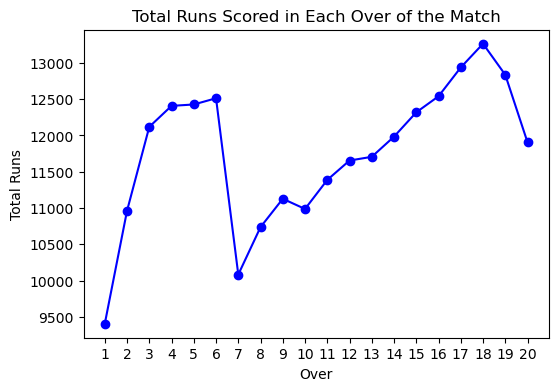

In [42]:
# Group the data by over and calculate total runs
runs_per_over = deliveries.groupby('over')['total_runs'].sum()

# Create a line plot
plt.figure(figsize=(6, 4))
plt.plot(runs_per_over.index, runs_per_over.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored in Each Over of the Match')
plt.xticks(range(1, 21))
plt.show()

#### 2. What is the distribution of batsman runs in the match?

<Figure size 1600x400 with 0 Axes>

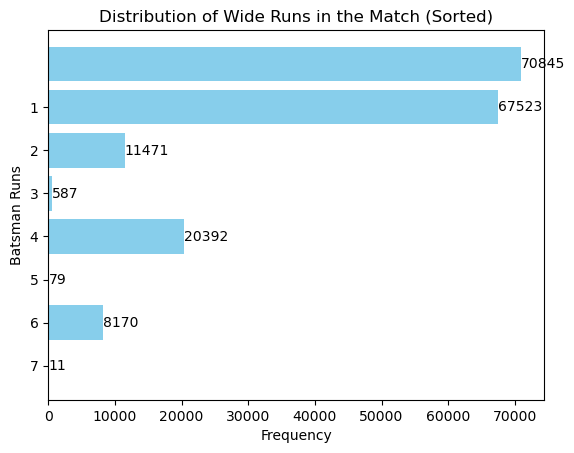

In [43]:
# Calculate the count of wide runs
wide_runs_count = deliveries['batsman_runs'].value_counts()

# Sort the wide runs count in descending order
wide_runs_count = wide_runs_count.sort_index(ascending=False)

plt.figure(figsize=(16, 4))
fig, ax = plt.subplots()
bars = ax.barh(wide_runs_count.index, wide_runs_count.values, color='skyblue')

# Add data labels to each bar
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Frequency')
plt.ylabel('Batsman Runs')
plt.title('Distribution of Wide Runs in the Match (Sorted)')
plt.yticks(range(1, wide_runs_count.index.max() + 1))
plt.gca().invert_yaxis()
plt.show()

#### 3. How does the batsman's strike rate change over the course of the innings?

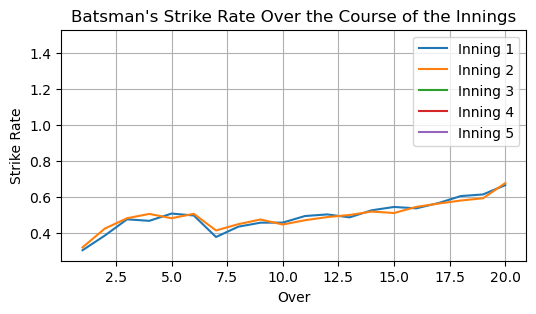

In [44]:
# Calculate the batsman's strike rate for each ball faced
deliveries['strike_rate'] = (deliveries['batsman_runs'] / deliveries['ball']).replace([np.inf, -np.inf], np.nan)

# Group by ball and calculate the mean strike rate
strike_rate_over_innings = deliveries.groupby(['inning', 'over'])['strike_rate'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(6, 3))
for inning, data in strike_rate_over_innings.groupby('inning'):
    plt.plot(data['over'], data['strike_rate'], label=f'Inning {inning}')
plt.xlabel('Over')
plt.ylabel('Strike Rate')
plt.title('Batsman\'s Strike Rate Over the Course of the Innings')
plt.legend()
plt.grid(True)
plt.show()

#### 4. What are the dismissal types and their frequencies in the dataset?

<Figure size 1600x300 with 0 Axes>

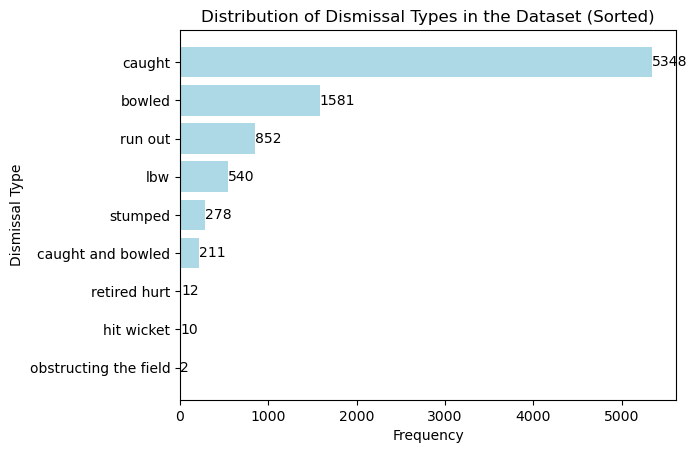

In [45]:
# Calculate the frequency of each dismissal type
dismissal_counts = deliveries['dismissal_kind'].value_counts()

# Sort the dismissal counts in descending order
dismissal_counts = dismissal_counts.sort_values(ascending=False)

plt.figure(figsize=(16, 3))
fig, ax = plt.subplots()
bars = ax.barh(dismissal_counts.index, dismissal_counts.values, color='lightblue')

# Add data labels to each bar
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.title('Distribution of Dismissal Types in the Dataset (Sorted)')
plt.gca().invert_yaxis()
plt.show()

#### 5. How does the total runs vary across different innings?

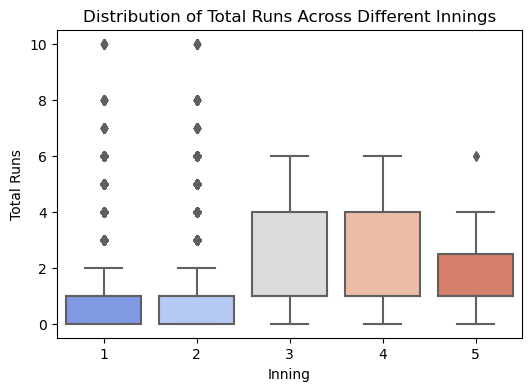

In [46]:
# Create a box plot to show the distribution of total runs by inning
plt.figure(figsize=(6, 4))
sns.boxplot(x='inning', y='total_runs', data=deliveries, palette='coolwarm')
plt.xlabel('Inning')
plt.ylabel('Total Runs')
plt.title('Distribution of Total Runs Across Different Innings')
plt.show()

#### 5. What is the distribution of extra runs (wides, byes, legbyes, etc.) for each team in the match?

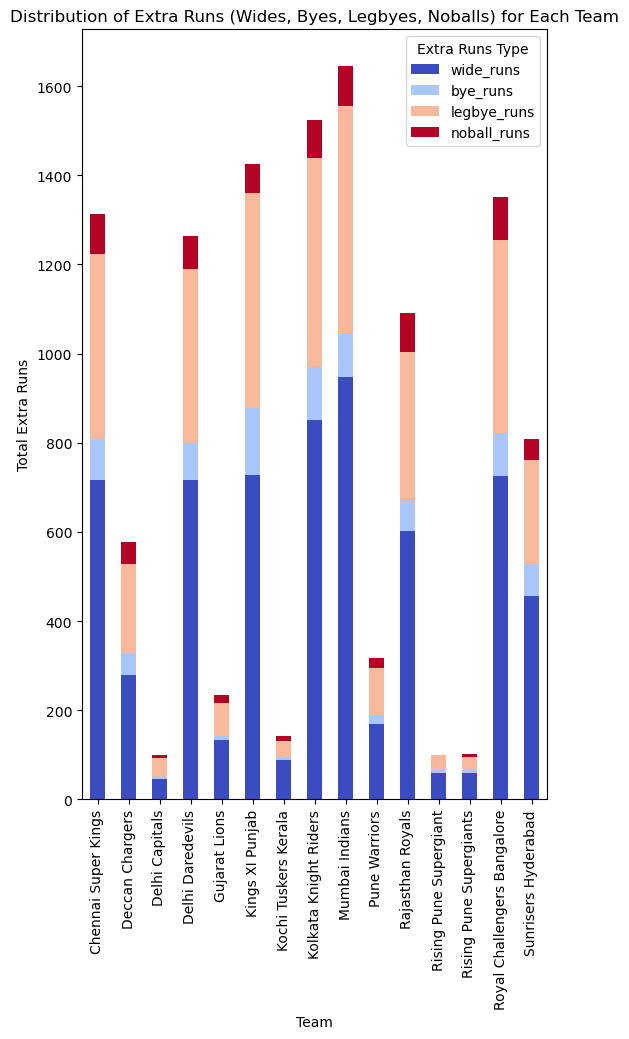

In [47]:
# Group by team and calculate the total extra runs for each category
extra_runs_by_team = deliveries.groupby('batting_team')[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs']].sum()

# Create a grouped bar chart
plt.figure(figsize=(6, 10))
extra_runs_by_team.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())
plt.xlabel('Team')
plt.ylabel('Total Extra Runs')
plt.title('Distribution of Extra Runs (Wides, Byes, Legbyes, Noballs) for Each Team')
plt.xticks(rotation=90)
plt.legend(title='Extra Runs Type')
plt.show()

#### 6. What is the distribution of runs scored by each batting team in the match?

<Figure size 1600x800 with 0 Axes>

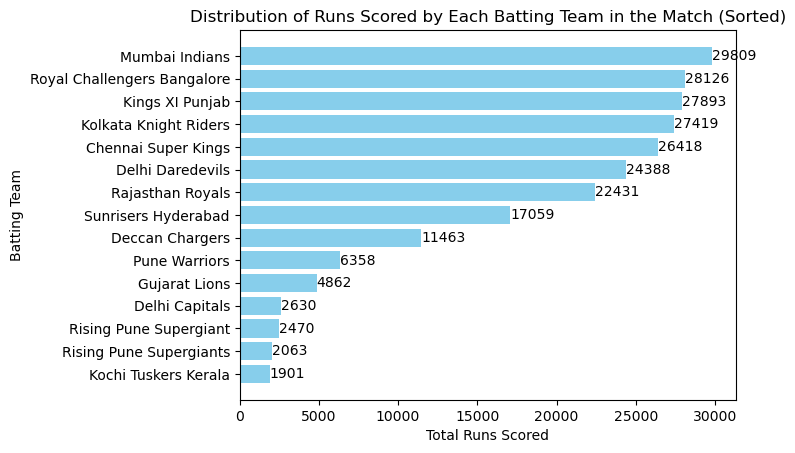

In [48]:
# Group the data by batting team and calculate total runs
runs_by_batting_team = deliveries.groupby('batting_team')['total_runs'].sum()

# Sort the data by total runs in descending order
runs_by_batting_team = runs_by_batting_team.sort_values(ascending=False)

plt.figure(figsize=(16, 8))
fig, ax = plt.subplots()
bars = ax.barh(runs_by_batting_team.index, runs_by_batting_team.values, color='skyblue')

# Add data labels to each bar
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Total Runs Scored')
plt.ylabel('Batting Team')
plt.title('Distribution of Runs Scored by Each Batting Team in the Match (Sorted)')
plt.gca().invert_yaxis()
plt.show()

#### 7. What is the distribution of deliveries faced by batsmen in an innings?

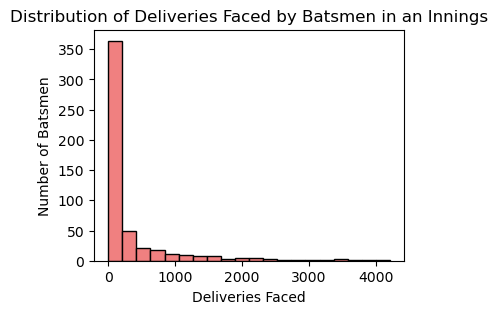

In [49]:
# Group the data by batsman and calculate the number of deliveries faced
deliveries_faced_by_batsmen = deliveries['batsman'].value_counts()

# Create a histogram
plt.figure(figsize=(4, 3))
plt.hist(deliveries_faced_by_batsmen, bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Deliveries Faced')
plt.ylabel('Number of Batsmen')
plt.title('Distribution of Deliveries Faced by Batsmen in an Innings')
plt.show()

#### 8. What is the trend of batsman runs in each over of the match?

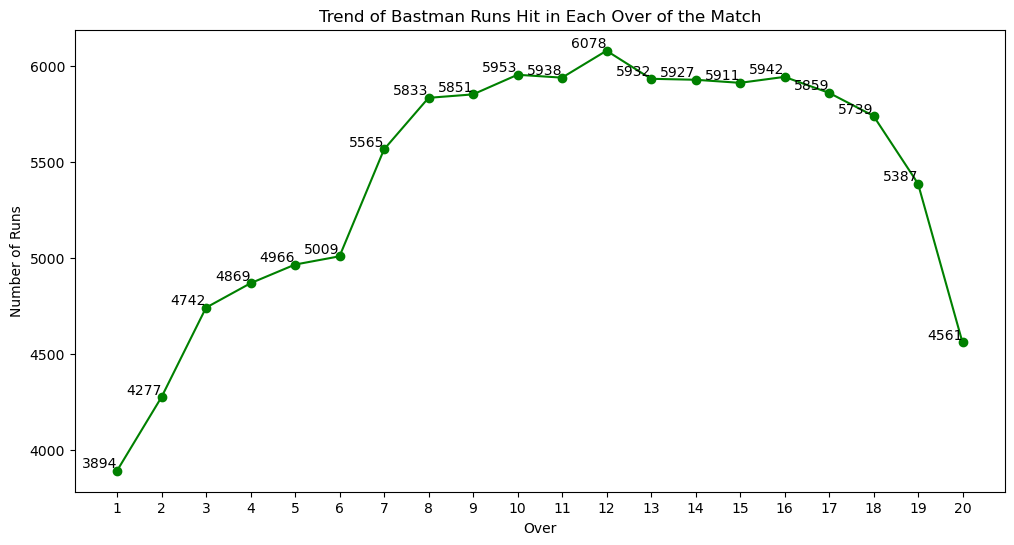

In [50]:
runs = deliveries[deliveries['batsman_runs'] > 0]

# Group the data by over and calculate the count of runs
runs_count_by_over = runs.groupby('over')['batsman_runs'].count()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(runs_count_by_over.index, runs_count_by_over.values, marker='o', linestyle='-', color='green')
plt.xlabel('Over')
plt.ylabel('Number of Runs')
plt.title('Trend of Bastman Runs Hit in Each Over of the Match')
plt.xticks(range(1, 21))

# Add data labels to the points
for x, y in zip(runs_count_by_over.index, runs_count_by_over.values):
    plt.text(x, y, str(y), ha='right', va='bottom')

plt.show()

#### 9. What is the average number of runs scored in powerplays (first 6 overs) compared to the rest of the innings?

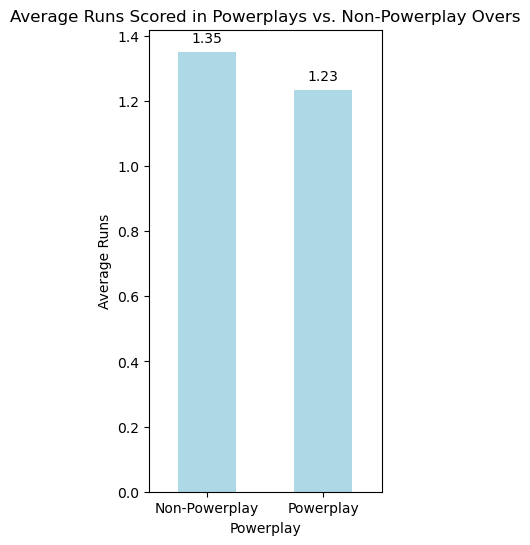

In [51]:
# Create a new column indicating whether it's a powerplay over
deliveries['is_powerplay'] = deliveries['over'] <= 6

# Group by powerplay and calculate the average runs
average_runs_by_powerplay = deliveries.groupby('is_powerplay')['total_runs'].mean()

# Create a bar chart
plt.figure(figsize=(3, 6))
ax = average_runs_by_powerplay.plot(kind='bar', color='lightblue')
plt.xlabel('Powerplay')
plt.ylabel('Average Runs')
plt.title('Average Runs Scored in Powerplays vs. Non-Powerplay Overs')
plt.xticks([0, 1], ['Non-Powerplay', 'Powerplay'], rotation=0)

# Add data labels to each bar
for i, v in enumerate(average_runs_by_powerplay):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

## Some Analyzes about Matches

In [52]:
# Calculate general statistics
total_matches = len(matches)
total_players = matches['team1'].nunique()
average_runs_per_match = round(matches['win_by_runs'].mean(), 2)
average_wickets_per_match = round(matches['win_by_wickets'].mean(), 2)

# Print the statistics
print("Total Teams:", total_players)
print("Total Matches:", total_matches)
print("Average Runs Scored per Match:", average_runs_per_match)
print("Average Wickets Taken per Match:", average_wickets_per_match)

Total Teams: 15
Total Matches: 756
Average Runs Scored per Match: 13.28
Average Wickets Taken per Match: 3.35


<div style="display: flex; flex-direction: column; align-items: center; justify-content: center; text-align: center; background-color: #f5f5f5; padding: 15px; border-radius: 10px; box-shadow: 2px 2px 5px #888888;">

  <div style="margin: 20px auto;">
    <h1 style="font-size: 20px; text-align: center; color: red;">Total Teams</h1>
    <p style="font-size: 20px;">15</p>
  </div>

  <div style="margin: 20px auto;">
    <h1 style="font-size: 20px; text-align: center; color: red;">Total Matches</h1>
    <p style="font-size: 20px;">756</p>
  </div>

  <div style="margin: 20px auto;">
    <h1 style="font-size: 20px; text-align: center; color: red;">Avg Runs by Match</h1>
    <p style="font-size: 20px;">13.28</p>
  </div>

  <div style="margin: 20px auto;">
    <h1 style="font-size: 20px; text-align: center; color: red;">Avg Wickets by Match</h1>
    <p style="font-size: 20px;">3.35</p>
  </div>

</div>

#### 1. How has the number of IPL matches changed over the years?

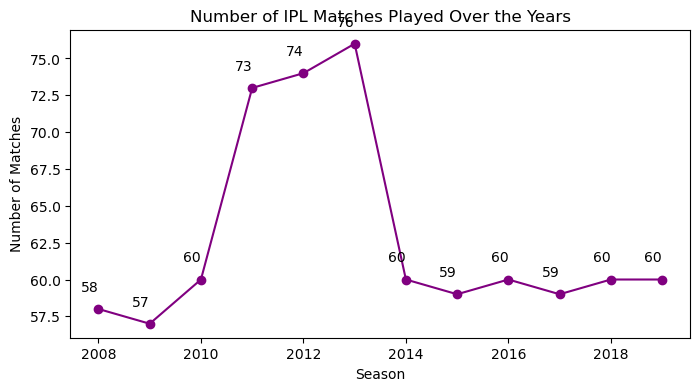

In [53]:
# Group the data by season and calculate the count of matches
matches_per_season = matches['season'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(8, 4))
plt.plot(matches_per_season.index, matches_per_season.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Number of IPL Matches Played Over the Years')
plt.xticks()

# Add data labels to the points
for x, y in zip(matches_per_season.index, matches_per_season.values):
    plt.text(x, y+1, str(y), ha='right', va='bottom')

plt.show()

#### 2. What is the top 5 teams with the most matches officiated?

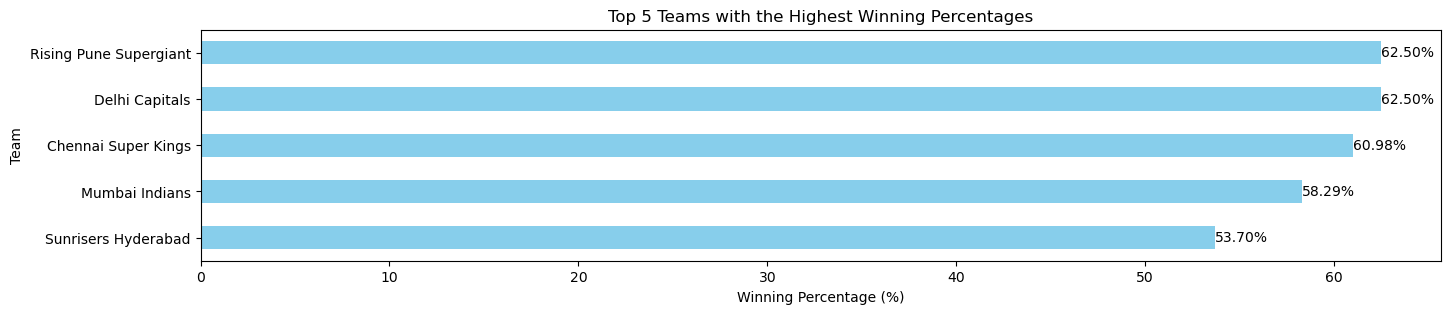

In [54]:
# Calculate winning percentages for each team
team_wins = matches['winner'].value_counts()
team_matches = pd.concat([matches['team1'], matches['team2']]).value_counts()
winning_percentages = (team_wins / team_matches) * 100

# Round the winning percentages to two decimal places
winning_percentages = winning_percentages.round(2)

# Sort teams by winning percentage
winning_percentages = winning_percentages.sort_values(ascending=True)

# Get the top 5 teams with the highest winning percentages
top_5_teams = winning_percentages.tail(5)  # Use .tail(5) to get the top 5 teams

# Create a bar chart to visualize the top 5 teams
plt.figure(figsize=(16, 3))
ax = top_5_teams.plot(kind='barh', color='skyblue')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Team')
plt.title('Top 5 Teams with the Highest Winning Percentages')

# Add data labels to each bar
for i, v in enumerate(top_5_teams):
    ax.text(v, i, f'{v:.2f}%', va='center', fontsize=10, color='black')

plt.xticks()
plt.show()

#### 3. What is the top 5 umpires with the most matches officiated?

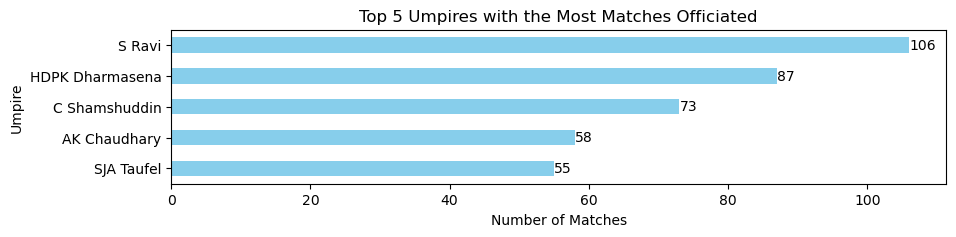

In [55]:
# Combine the 'umpire1' and 'umpire2' columns and calculate the frequency of each umpire
umpire_counts = pd.concat([matches['umpire1'], matches['umpire2']]).value_counts()

# Get the top 5 umpires with the most matches
top_5_umpires = umpire_counts.head(5)

# Create a horizontal bar chart
plt.figure(figsize=(10, 2))
ax = top_5_umpires.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Matches')
plt.ylabel('Umpire')
plt.title('Top 5 Umpires with the Most Matches Officiated')

# Add data labels to each bar
for i, v in enumerate(top_5_umpires):
    ax.text(v, i, str(v), va='center', fontsize=10, color='black')

plt.gca().invert_yaxis()  # Invert the y-axis to show the highest frequency at the top
plt.show()

#### 3. Which venue has hosted the most IPL matches, and what is the distribution of matches across venues?

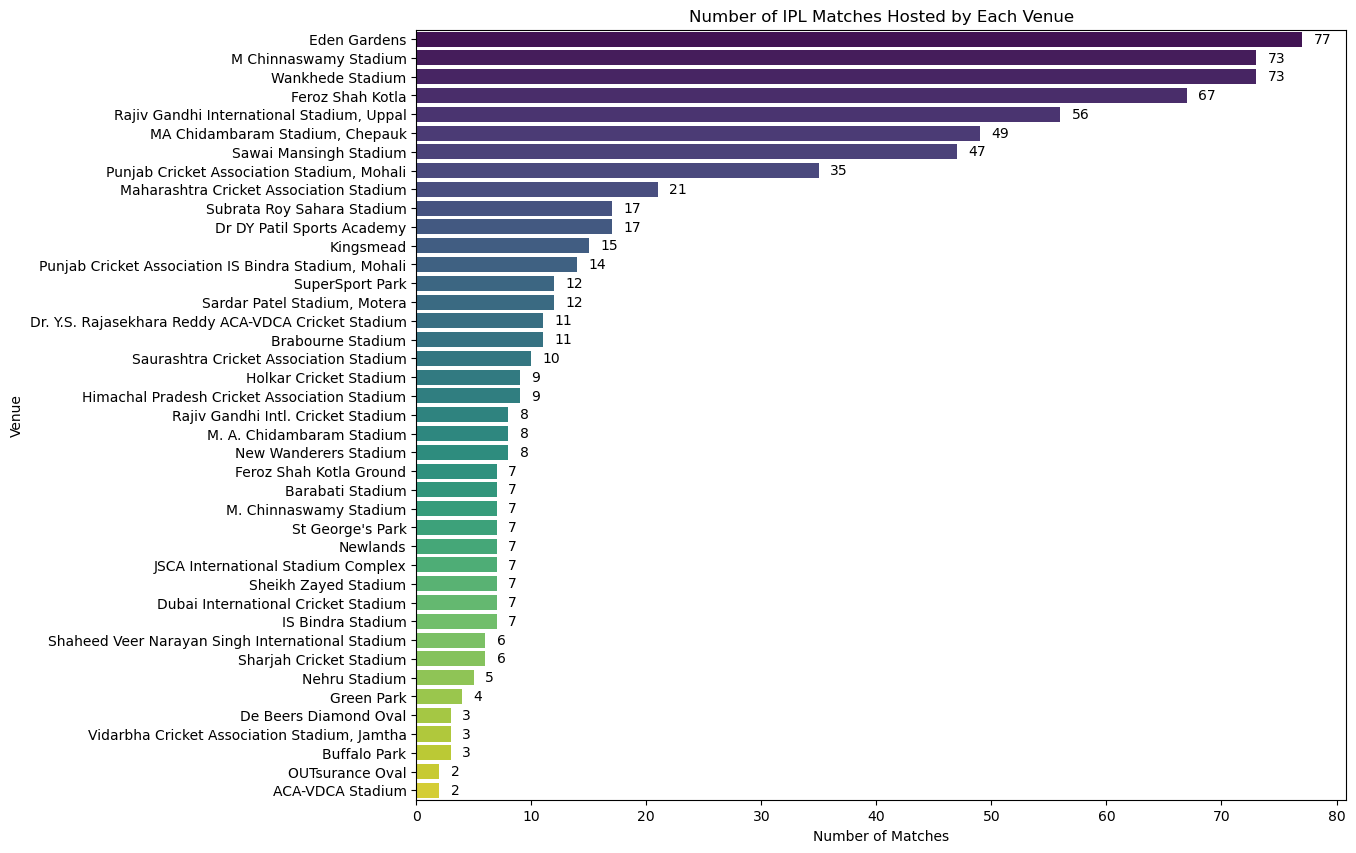

In [56]:
# Calculate the count of matches played at each venue
venue_counts = matches['venue'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 10))
ax = sns.barplot(x=venue_counts.values, y=venue_counts.index, palette='viridis')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.title('Number of IPL Matches Hosted by Each Venue')

# Add data labels to each bar
for i, v in enumerate(venue_counts.values):
    ax.text(v + 1, i, str(v), va='center', fontsize=10, color='black')

plt.show()

#### 4. What are the top 5 players with the most "Player of the Match" awards in IPL history?

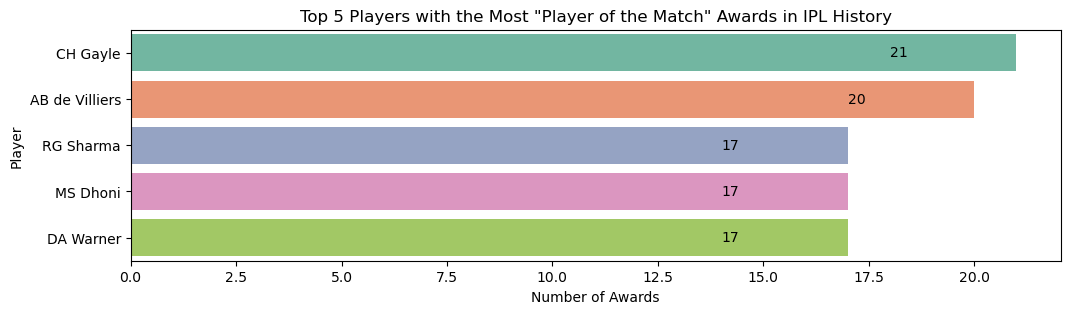

In [57]:
# Calculate the top 5 players with the most "Player of the Match" awards
top_players = matches['player_of_match'].value_counts().nlargest(5)

# Create a horizontal bar chart
plt.figure(figsize=(12, 3))
ax = sns.barplot(x=top_players.values, y=top_players.index, palette='Set2')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.title('Top 5 Players with the Most "Player of the Match" Awards in IPL History')

# Add data labels to each bar
for i, v in enumerate(top_players.values):
    ax.text(v -3, i, str(v), va='center', fontsize=10, color='black')

plt.show()

#### 5. What is the distribution of matches won by teams in IPL history?

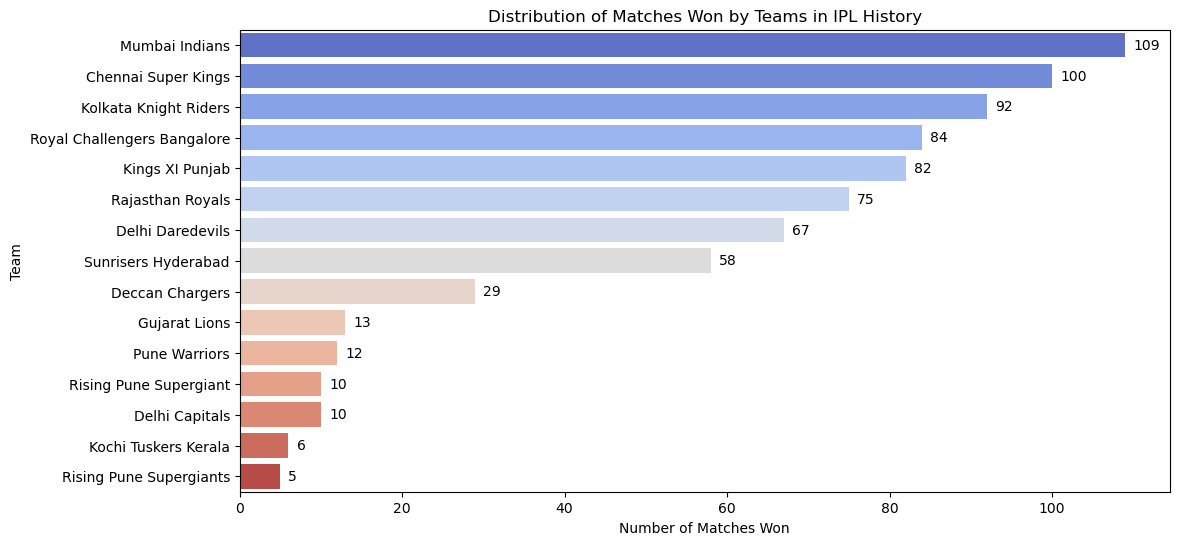

In [58]:
# Calculate the count of matches won by each team
matches_won_by_teams = matches['winner'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=matches_won_by_teams.values, y=matches_won_by_teams.index, palette='coolwarm')
plt.xlabel('Number of Matches Won')
plt.ylabel('Team')
plt.title('Distribution of Matches Won by Teams in IPL History')

# Add data labels to each bar
for i, v in enumerate(matches_won_by_teams.values):
    ax.text(v + 1, i, str(v), va='center', fontsize=10, color='black')

plt.show()

#### 6. What is the distribution of Toss Decisions Across Seasons?

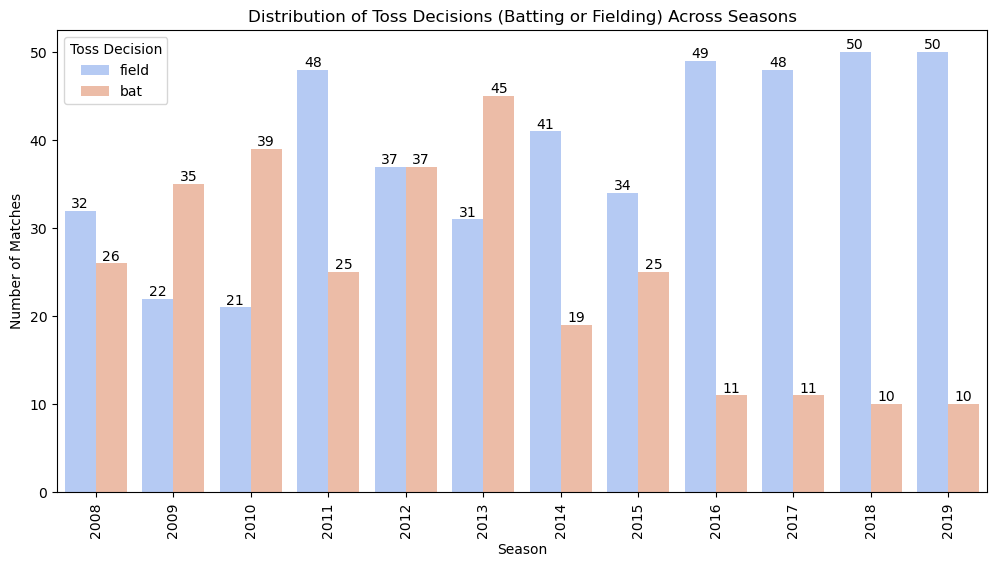

In [59]:
# Create a stacked bar chart for toss decisions by season
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=matches, x='season', hue='toss_decision', palette='coolwarm')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Distribution of Toss Decisions (Batting or Fielding) Across Seasons')
plt.xticks(rotation=90)
plt.legend(title='Toss Decision')

# Add data labels to each bar segment
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

#### 7. What is the trend of Average Margin of Victory?

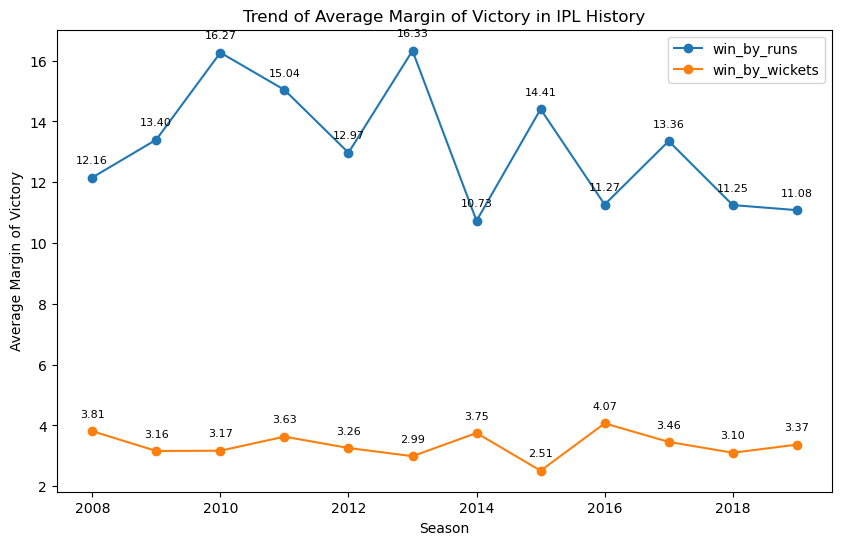

In [60]:
# Calculate the average margin of victory (win by runs or win by wickets) by season
average_margin_by_season = matches.groupby('season')[['win_by_runs', 'win_by_wickets']].mean()

# Create a line plot to show the trend
plt.figure(figsize=(10, 6))
ax = average_margin_by_season.plot(marker='o', linestyle='-', ax=plt.gca())
plt.xlabel('Season')
plt.ylabel('Average Margin of Victory')
plt.title('Trend of Average Margin of Victory in IPL History')

# Add data labels to each point on the line plot
for line in ax.lines:
    x, y = line.get_data()
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(f'{yi:.2f}', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')

plt.show()

#### 8. What is the winning Percentage?

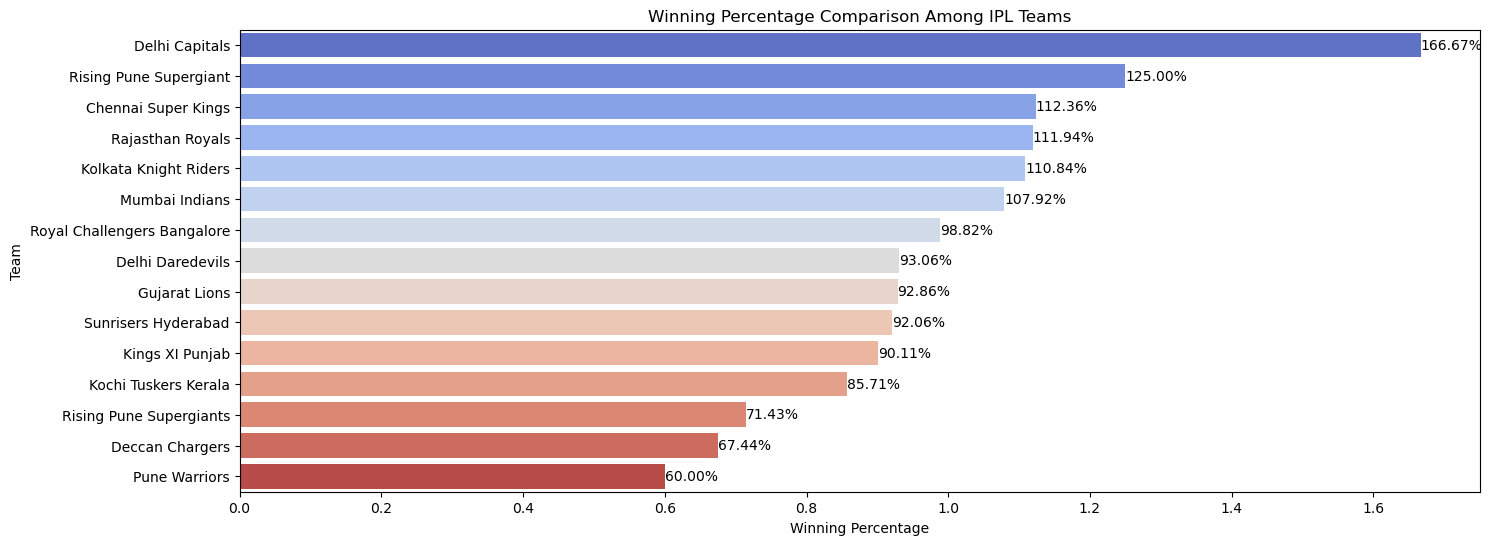

In [61]:
# Calculate the winning percentage for each team
winning_percentage = (matches['winner'].value_counts() / matches['team1'].value_counts()).sort_values(ascending=False)

# Create a bar chart to compare winning percentages
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=winning_percentage.values, y=winning_percentage.index, palette='coolwarm')
plt.xlabel('Winning Percentage')
plt.ylabel('Team')
plt.title('Winning Percentage Comparison Among IPL Teams')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2%}', ha="left", va="center")

plt.show()

In [62]:
# Calculate winning percentages for each team
team_wins = matches['winner'].value_counts()
team_matches = pd.concat([matches['team1'], matches['team2']]).value_counts()
winning_percentages = (team_wins / team_matches) * 100

# Sort teams by winning percentage
winning_percentages = winning_percentages.sort_values(ascending=False)

# Display the teams with their winning percentages
print("Teams and Their Winning Percentages:")
print(winning_percentages)

Teams and Their Winning Percentages:
Delhi Capitals                 62.500000
Rising Pune Supergiant         62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64


## Conclusion

In this analysis of the Indian Premier League (IPL) datasets, we explored various aspects of both the deliveries and matches datasets. Here are some key findings:

### Deliveries Dataset

- We investigated the distribution of runs scored in each over of the match, revealing interesting insights into batting strategies throughout the innings.

- We examined how the batsman's strike rate changes over the course of the innings, shedding light on the dynamics of batting performance.

- We explored the types of player dismissals and their frequencies, providing insights into the wickets taken by various methods.

- We visualized how the total runs vary across different innings, highlighting the variability in team performances.

- We compared the distribution of extra runs (wides, byes, legbyes, etc.) for different teams in a match, showcasing the impact of extras on the outcome.

### Matches Dataset

- We identified the team that has won the most matches in IPL history, showcasing their dominance in the tournament.

- We visualized the distribution of match results, including normal, tie, and no result matches, providing an overview of match outcomes.

- We discovered the top 5 players who have received the most "Player of the Match" awards, recognizing their outstanding performances.

- We displayed the top 5 umpires who have officiated the most matches, acknowledging their significant contributions to the game.

This analysis offers valuable insights into the world of IPL cricket, allowing us to understand the performance of teams, players, and officials. These findings can inform strategic decisions, endorsements, and fan engagement within the IPL ecosystem.


### Made by: **Abdelrahman Eldaba**